<a href="https://colab.research.google.com/github/hildazaqya/project-capstone/blob/main/firna/Foodection%20MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data from Kaggle

This data is collect mannually from many website, dan also in the data was captured using a smartphone camera.

In [ ]:
#kaggle
!pip install kaggle

In [1]:
#this file from kaggle API personnal account
from google.colab import files

# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smjayyy","key":"a86a230a085a77cff7a5851725589584"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#link dataset in Kaggle.com
!kaggle datasets download -d alinesellwia/foodection-dataset

100% 991M/994M [00:47<00:00, 31.2MB/s]
100% 994M/994M [00:47<00:00, 21.7MB/s]


In [6]:
#new directory for stores temporary data
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [5]:
#unzip the data
!unzip -q foodection-dataset.zip -d data/datasetfull

#Install Library

In [39]:
#Train Data, Augmentation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2

#optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

#interach with OS -> make directory
import os

#Visualization
%matplotlib inline

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Set the directory to easily navigate to the generator

In [8]:
base_dir= '/content/data/datasetfull/Foodection Dataset'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/test'))

Contents of base directory:
['train', 'test']

Contents of train directory:
['wortel_segar_sedang', 'jeruk_segar', 'tomat_segar_sedang', 'jeruk_busuk', 'jeruk_segar_sedang', 'wortel_wegar', 'tomat_segar', 'tomat_busuk', 'wortel_busuk']

Contents of validation directory:
['wortel_segar', 'wortel_segar_sedang', 'jeruk_segar', 'tomat _segar_sedang', 'jeruk_busuk', 'jeruk_segar_sedang', 'tomat_segar', 'tomat_busuk', 'wortel_busuk']


In [9]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Specify class of the directory train
train_jeruksegar_dir = os.path.join(train_dir, 'jeruk_segar')
train_wortelsegar_dir = os.path.join(train_dir, 'wortel_wegar')
train_wortelsegarsedang_dir = os.path.join(train_dir, 'wortel_wegar')
train_tomatbusuk_dir = os.path.join(train_dir, 'tomat_busuk')
train_jeruksegarsedang_dir = os.path.join(train_dir, 'jeruk_segar_sedang')
train_jerukbusuk_dir = os.path.join(train_dir, 'jeruk_busuk')
train_wortelbusuk_dir = os.path.join(train_dir, 'wortel_busuk')
train_tomatsegar_dir = os.path.join(train_dir, 'tomat_segar')
train_tomatsegarsedang_dir = os.path.join(train_dir, 'tomat_segar_sedang')

# Specify class of the directory test
test_jeruksegar_dir = os.path.join(test_dir, 'jeruk_segar')
test_wortelsegar_dir = os.path.join(test_dir, 'wortel_segar')
test_wortelsegarsedang_dir = os.path.join(test_dir, 'wortel_segar_sedang')
test_tomatbusuk_dir = os.path.join(test_dir, 'tomat_busuk')
test_jeruksegarsedang_dir = os.path.join(test_dir, 'jeruk_segar_sedang')
test_jerukbusuk_dir = os.path.join(test_dir, 'jeruk_busuk')
test_wortelbusuk_dir = os.path.join(test_dir, 'wortel_busuk')
test_tomatsegar_dir = os.path.join(test_dir, 'tomat_segar')
test_tomatsegarsedang_dir = os.path.join(test_dir, 'tomat _segar_sedang')

In [10]:
train_jeruksegar_fnames = os.listdir(train_jeruksegar_dir)
train_wortelsegar_fnames = os.listdir(train_wortelsegar_dir)
train_wortelsegarsedang_fnames = os.listdir(train_wortelsegarsedang_dir)
train_tomatbusuk_fnames = os.listdir(train_tomatbusuk_dir)
train_jeruksegarsedang_fnames = os.listdir(train_jeruksegarsedang_dir)
train_jerukbusuk_fnames = os.listdir(train_jerukbusuk_dir)
train_wortelbusuk_fnames = os.listdir(train_wortelbusuk_dir)
train_tomatsegar_fnames = os.listdir(train_tomatsegar_dir)
train_tomatsegarsedang_fnames = os.listdir(train_tomatsegarsedang_dir)

print(train_jeruksegar_fnames[:10])
print(train_wortelsegar_fnames[:10])

['jeruk (382).png', 'jeruk (972).png', 'freshOrange (62).png', 'jeruk (1011).png', 'jeruk (123).png', 'freshOrange (61).png', 'jeruk (764).png', 'jeruk (496).png', 'jeruk (368).png', 'jeruk (1348).png']
['0424.jpg', '0930.jpg', '0975.jpg', '0834.jpg', '1243.jpg', '0679.jpg', '1238.jpg', '1143.jpg', '0687.jpg', '0624.jpg']


# Every Class Len

In [11]:
print('total training jeruk segar images :', len(os.listdir(train_jeruksegar_dir)))
print('total training wortel segar images :', len(os.listdir( train_wortelsegar_dir)))
print('total training wortel segar sedang images :', len(os.listdir(train_wortelsegarsedang_dir)))
print('total training tomat busuk images :', len(os.listdir(train_tomatbusuk_dir)))
print('total training jeruk segar sedang images :', len(os.listdir(train_jeruksegarsedang_dir)))
print('total training jeruk busuk images :', len(os.listdir(train_jerukbusuk_dir)))
print('total training wortel busuk images :', len(os.listdir(train_wortelbusuk_dir)))
print('total training tomat segar images :', len(os.listdir(train_tomatsegar_dir)))
print('total training tomat segar sedang images :', len(os.listdir(train_tomatsegarsedang_dir)))

print('total testing jeruk segar images :', len(os.listdir(test_jeruksegar_dir)))
print('total testing wortel segar images :', len(os.listdir(test_wortelsegar_dir)))
print('total testing wortel segar sedang images :', len(os.listdir(test_wortelsegarsedang_dir)))
print('total testing tomat busuk images :', len(os.listdir(test_tomatbusuk_dir)))
print('total testing jeruk segar sedang images :', len(os.listdir(test_jeruksegarsedang_dir)))
print('total testing jeruk busuk images :', len(os.listdir(test_jerukbusuk_dir)))
print('total testing wortel busuk images :', len(os.listdir(test_wortelbusuk_dir)))
print('total testing tomat segar images :', len(os.listdir(test_tomatsegar_dir)))
print('total testing tomat segar sedang images :', len(os.listdir(test_tomatsegarsedang_dir)))

total training jeruk segar images : 1368
total training wortel segar images : 1114
total training wortel segar sedang images : 1114
total training tomat busuk images : 1002
total training jeruk segar sedang images : 693
total training jeruk busuk images : 1280
total training wortel busuk images : 183
total training tomat segar images : 1185
total training tomat segar sedang images : 169
total testing jeruk segar images : 317
total testing wortel segar images : 279
total testing wortel segar sedang images : 40
total testing tomat busuk images : 85
total testing jeruk segar sedang images : 173
total testing jeruk busuk images : 319
total testing wortel busuk images : 45
total testing tomat segar images : 204
total testing tomat segar sedang images : 42


#Check With Visualization

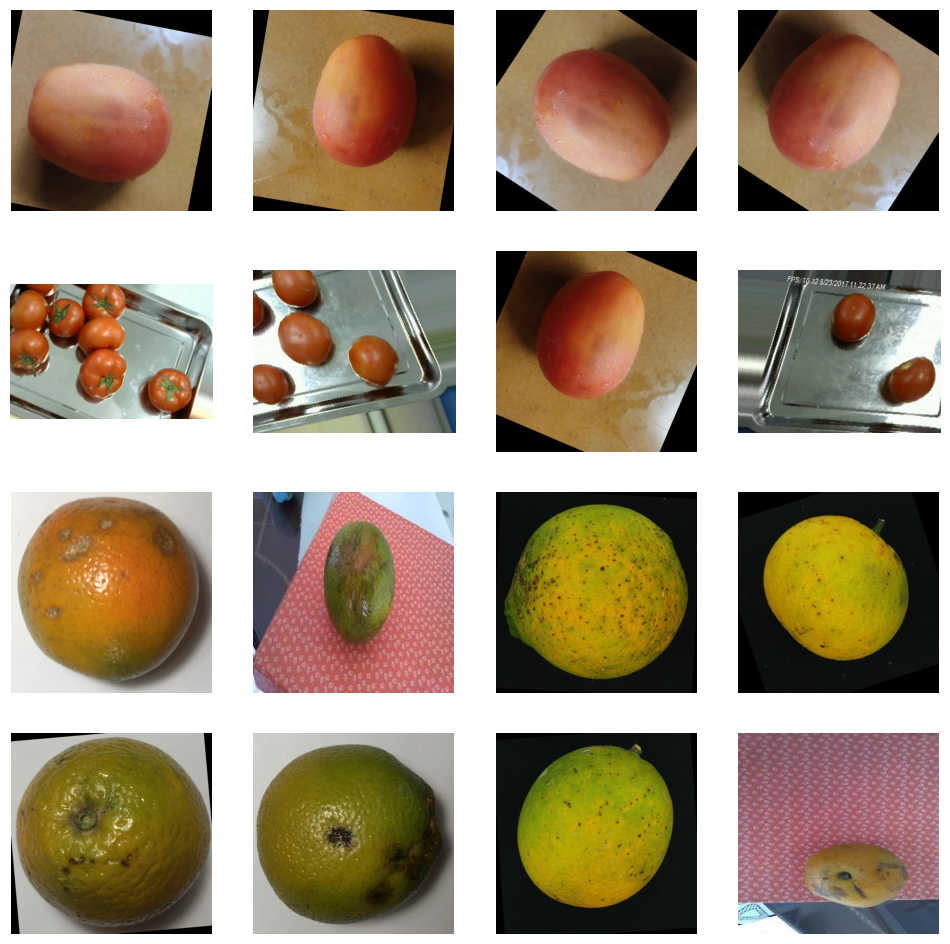

In [13]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0  # Add a line break here

fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

pic_index += 8

next_tomatsegarsedang_pix = [os.path.join(train_tomatsegarsedang_dir, fname)
                            for fname in train_tomatsegarsedang_fnames[pic_index - 8:pic_index]
                            ]

next_jeruksegarsedang_pix = [os.path.join(train_jeruksegarsedang_dir, fname)
                            for fname in train_jeruksegarsedang_fnames[pic_index - 8:pic_index]
                            ]

for i, img_path in enumerate(next_tomatsegarsedang_pix  + next_jeruksegarsedang_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

#Make Augmentation

In [41]:
img_height = 128
img_width = 128
img_channels = 3
num_epochs = 10

train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                   horizontal_flip=True,
                                    vertical_flip=True,
                                    zoom_range=0.2,
                                    fill_mode='nearest')
test_datagen  = ImageDataGenerator( rescale = 1.0/255.)

train_generator= train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 7099 images belonging to 9 classes.
Found 1503 images belonging to 9 classes.


Transfer Learning MobileNet

In [54]:
mobile_net_v2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in mobile_net_v2.layers[:-5]:
    layer.trainable = False

# Choose a specific layer for feature extraction
last_layer = mobile_net_v2.get_layer('block_13_expand')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(9, activation='softmax')(x)

model = Model(mobile_net_v2.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
history = model.fit(train_generator, epochs=num_epochs, validation_data=test_generator)

Epoch 1/10
 27/355 [=>............................] - ETA: 49s - loss: 3.7513 - accuracy: 0.3488

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


355/355 [==============================] - 76s 204ms/step - loss: 1.3546 - accuracy: 0.6421 - val_loss: 6.5593 - val_accuracy: 0.3959
Epoch 2/10
355/355 [==============================] - 71s 201ms/step - loss: 0.7283 - accuracy: 0.7883 - val_loss: 7.8829 - val_accuracy: 0.4351
Epoch 3/10
355/355 [==============================] - 72s 203ms/step - loss: 0.5778 - accuracy: 0.8455 - val_loss: 9.9014 - val_accuracy: 0.4518
Epoch 4/10
355/355 [==============================] - 72s 204ms/step - loss: 0.5047 - accuracy: 0.8631 - val_loss: 10.2699 - val_accuracy: 0.4411
Epoch 5/10
355/355 [==============================] - 71s 200ms/step - loss: 0.4727 - accuracy: 0.8783 - val_loss: 10.1911 - val_accuracy: 0.4544
Epoch 6/10
355/355 [==============================] - 71s 200ms/step - loss: 0.4119 - accuracy: 0.8938 - val_loss: 10.2726 - val_accuracy: 0.4724
Epoch 7/10
355/355 [==============================] - 71s 200ms/step - loss: 0.3698 - accuracy: 0.9035 - val_loss: 11.6071 - val_accuracy:

Text(0.5, 1.0, 'Training and validation loss')

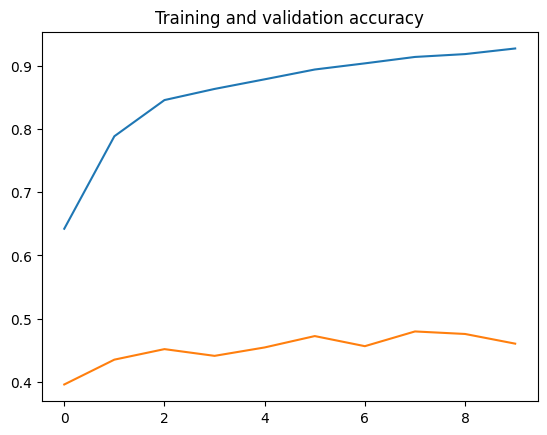

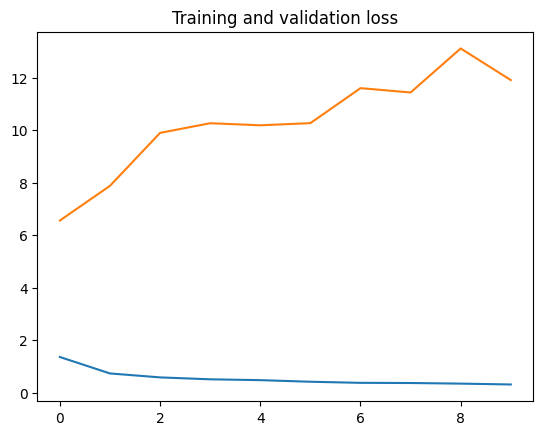

In [56]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

Model Description Experiment :

1. CNN-3(Trainacc=98 Valacc=43 time=10m25s)Overfitting
   * epoch 10
   * batch size 20
   * augmentation rescale(val and train)
   * no drop out
2. RestNet50(Trainacc=69,60 valacc=24,35 time=8m51s)Overfitting
   * epoch 10
   * batch size 20
   * augmentation rescale(val and train)
   * no drop out
3. MobileNet(Trainacc=96,89 valacc=52,10 time=11m45s)
   * epoch 10
   * batch size 20
   * augmentation rescale, horizontal flip,vertical flip,zoom range 0.2, fill mode nearest(train) and rescale,zoom range (val)
   * dropout(0,5)